# Investigation of GDP vs Mortality vs Life Expectancy

## Group Members: Katie Manzoline, Angela Boardman & Nabeel Qazi

**Hypothesis**: We have examined global mortality and life expectancy data and global economic data to look for correlations among mortality rates, GDP, and life expectancy by country and by region.
1. We expect that life expectancy is positively correlated with GDP. 
$H_0 =$ There is no relationship between life expectancy and GDP.
2. We expect that mortality rate is inversely related to GDP, i.e., countrieswith higher GDPs will tend to have lower mortality rates.$H_0 =$ = There is no relationship between mortality rates and GDP

**Sources**:-
1. **WHO**. World Health Organization Global Health Observatory data repository. "Adult mortality data by country." Retrieved fromhttp://apps.who.int/gho/data/view.main.1360?lang=en¶. Last updated 2018-05-07. Features 17 years' of mortality data from 183 countries
2. **Google** public data repository. [Centroid data by country.] Downloaded from https://developers.google.com/public-data/docs/canonical/countries_csv on 26 January 2020
3. **Kaggle**: https://www.kaggle.com/kumarajarshi/life-expectancy-who/version/1
4. **CDC** Centre for Disease Control: CDC WONDER (underlying cause of death; multiple cause of death) https://wonder.cdc.gov/

**Findings**:-
1. Overall, GDP of entire world is increasing overtime.
2. Overall, mortality rate stays stable overtime in the previous 17 year period.
3. Generally speaking, life expectancy is increasing over time (we are living longer than ever before.)
4. Africa has the highest mortality rate
5. There are 5 leading causes of deaths for 25-34 year old Men/Women in USA, among which Use of narcotics rose consistently from 2000 - 2017

**Un-answered Questions**:
1. Correlation of specific diseases to countries.
2. Further investigation into leading causes of deaths in USA for 25-34 year old age-groups.
3. Breakdown of causes of deaths in the USA by States

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import requests
from config import g_key
import gmaps
import random
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import gmaps.geojson_geometries
import numpy as np
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

gmaps.configure(api_key = g_key)

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

csv_file = os.path.join('Resources','GDP_1970_to_2018_wLatLng.csv')
gdp_data = pd.read_csv(csv_file)

In [2]:
gdp_data.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Latitude,Longitude
0,Afghanistan,AFG,0.174889,0.183111,0.159556,0.173333,0.215556,0.236667,0.255556,0.295333,0.330000,0.369794,0.364172,0.347879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405518,0.451556,0.522678,0.620914,0.697129,0.974789,1.010922,1.243909,1.585657,1.780428,2.000162,2.056105,2.048487,1.990711,1.936264,2.019176,1.936297,NaN,33.939110,67.709953
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185734,0.189705,0.209733,0.208080,0.205124,0.225309,0.202855,0.109956,0.065217,0.118532,0.188095,0.239276,0.319964,0.225852,0.254597,0.321212,0.348036,0.392210,0.434807,0.561149,0.718468,0.805208,0.889607,1.067732,1.288135,1.204422,1.192696,1.289087,1.231978,1.277628,1.322824,1.138693,1.186135,1.302506,1.510250,NaN,41.153332,20.168331
2,Algeria,DZA,0.486349,0.507722,0.676179,0.871511,1.320971,1.555793,1.772835,2.097190,2.636449,3.324342,4.234528,4.434867,4.520709,4.880137,5.369828,5.793787,6.369630,6.674227,5.908907,5.563149,6.204510,4.571537,4.800330,4.994646,4.254257,4.176405,4.694150,4.817786,4.818775,4.863911,5.478607,5.474325,5.675811,6.786614,8.532477,10.319844,11.703094,13.497873,17.099754,13.721482,16.120507,20.001536,20.906289,20.975476,21.380881,16.597843,16.003293,16.739027,17.375795,NaN,28.033886,1.659626
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051400,0.052700,0.051200,0.050300,0.049600,0.052000,0.056300,0.067800,0.057600,0.057400,0.064400,0.064100,0.064200,0.066100,0.065200,0.060200,0.063600,NaN,-14.270972,-170.132217
4,Andorra,AND,0.007862,0.008941,0.011341,0.015082,0.018656,0.022013,0.022728,0.025402,0.030801,0.041158,0.044642,0.038896,0.037590,0.032786,0.033007,0.034674,0.048200,0.061132,0.072143,0.079545,0.102905,0.110693,0.121001,0.100703,0.101755,0.117874,0.122395,0.118060,0.121193,0.123988,0.143443,0.149691,0.173312,0.239865,0.293566,0.325579,0.354326,0.401697,0.400735,0.366053,0.335570,0.344206,0.316462,0.328159,0.335074,0.281149,0.287731,0.301339,0.323654,NaN,42.506285,1.521801


In [3]:
gdp_summary_df = gdp_data.describe()
gdp_summary_df = gdp_summary_df.T
gdp_summary_df = gdp_summary_df.reset_index()
gdp_summary_df = gdp_summary_df.rename(columns={'index':'Year'})
gdp_summary_df

,Year,count,mean,std,min,25%,50%,75%,max
0,1970,126.0,2.213508,10.075194,0.001430,0.032290,0.149733,0.877160,107.330300
1,1971,127.0,2.427800,10.946762,0.001528,0.034894,0.166650,0.896681,116.485000
2,1972,127.0,2.802478,12.200024,0.001894,0.041050,0.191071,0.961574,127.911000
3,1973,127.0,3.419085,13.956601,0.002420,0.051529,0.234480,1.387484,142.537600
4,1974,128.0,3.910219,15.148053,0.003151,0.056503,0.291005,1.624305,154.524300
5,1975,130.0,4.298518,16.502380,0.003251,0.068578,0.284540,1.654736,168.490400
6,1976,131.0,4.632820,18.142313,0.003004,0.071816,0.307659,1.774159,187.341200
7,1977,135.0,5.078241,20.085315,0.003414,0.074835,0.322744,1.980872,208.182600
8,1978,134.0,6.030932,23.541727,0.004157,0.091149,0.361241,2.369361,235.159900
9,1979,135.0,6.946176,26.289843,0.004262,0.106943,0.408488,2.772129,262.733400


## Mean GDP over time for the entire world

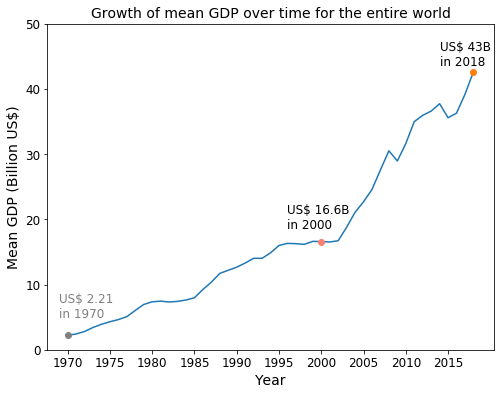

In [4]:
mean_GDP_over_time = gdp_summary_df.groupby('Year')['mean'].first()
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Growth of mean GDP over time for the entire world', fontsize = 14);
ax1.set_xlabel('Year', fontsize = 14)
ax1.set_ylabel('Mean GDP (Billion US$)', fontsize = 14);
ax1.set_ylim([0,50]);
ax1.plot(mean_GDP_over_time.drop(['Latitude','Longitude']));
ax1.plot([48],[mean_GDP_over_time['2018']],'o')
ax1.plot([30],[mean_GDP_over_time['2000']],'o', color = 'salmon')
ax1.plot([0],[mean_GDP_over_time['1970']],'o', color='gray')
xticks_values = [_ for _ in range(0,50,5)];
ax1.set_xticks(xticks_values);
ax1.annotate(f'US$ {round(mean_GDP_over_time["1970"], 2)} \nin 1970', \
             xy=(-1, mean_GDP_over_time['1970']*2.25), fontsize = 12, color='gray')
ax1.annotate('US$ 43B \nin 2018', xy=(44, mean_GDP_over_time['2018']+1), fontsize = 12, color='black')
ax1.annotate('US$ 16.6B \nin 2000', xy=(30-4, mean_GDP_over_time['2000']+2), fontsize = 12, color='black')
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.legend('Test', loc='right')

plt.savefig("Images/MeanGDP_over_time.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

## Display countries colored with GDP values for a chosen year

In [5]:
year = input('Enter a year between 1970 - 2018:')

Enter a year between 1970 - 2018:2018


In [6]:
# Pick only those country codes which correspond to the geojson string file
common_country_names = []
for feature in countries_geojson['features']:
    gmap_country_name = feature['properties']['name']
    if gmap_country_name in list(gdp_data['Country Name']):
        common_country_names.append(gmap_country_name)
len(common_country_names)

gdp_list = []
for country in common_country_names:
    if country in list(gdp_data['Country Name']):
        gdp_val = list(gdp_data[gdp_data['Country Name'] == country][year])[0]
        temp_tuple = (country,round(gdp_val,2))
        gdp_list.append(temp_tuple)
country2gdp = dict(gdp_list)

# We will need to scale the GDP values to lie between 0 and 1
min_gdp = min(country2gdp.values())
max_gdp = max(country2gdp.values())
gdp_range = max_gdp - min_gdp

def calculate_color(gdp_value):
    """
    Convert the GDP coefficient to a color
    """
    # make gini a number between 0 and 1
    normalized_gdp = (gdp_value - min_gdp) / gdp_range

    # invert gini so that high inequality gives dark color
#     inverse_gdp = 1.0 - normalized_gdp
    inverse_gdp = normalized_gdp

    # transform the gini coefficient to a matplotlib color
    mpl_color = viridis(inverse_gdp)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(mpl_color, keep_alpha=False)

    return gmaps_color

#  build an array of colors, one for each country
colors = []
for feature in countries_geojson['features']:
    country_name = feature['properties']['name']
    try:
        gdp = country2gdp[country_name]
        color = calculate_color(gdp)
    except KeyError:
        # no gdp for that country: return default color
        color = (0, 0, 0, 0.3)
    colors.append(color)

D:\Python3.7\envs\PythonData\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [7]:
# Customize the size of the figure
figure_layout = {
    'width': '1000px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '0px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(zoom_level = 2, center = (40,10), layout=figure_layout, display_toolbar = True)
geojson = gmaps.geojson_layer(countries_geojson, fill_opacity=0.05, stroke_weight=2)
fig.add_layer(geojson)
fig

gdp_layer = gmaps.geojson_layer(countries_geojson,fill_color=colors, fill_opacity = 0.8, stroke_weight=2)
fig.add_layer(geojson)
fig

fig.add_layer(gdp_layer)
fig

coordinates = gdp_data[['Latitude','Longitude']]

info_box_list = []
for country in list(gdp_data['Country Name']):
    try:
        gdp_val = list(gdp_data[gdp_data['Country Name'] == country][year])[0]
        info_box_list.append(f'{country}; US$ {round(gdp_val,2)}B')
    except:
        continue
    
symbol_layer = gmaps.symbol_layer(coordinates, \
                                  scale = 2, \
                                  fill_color='red', \
                                  stroke_color='red', \
                                 info_box_content=info_box_list)

# Add layer
fig.add_layer(symbol_layer)

# Display figure
fig


Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='0px', wi…

## Mortality data for 25-34 year old Male/Female in USA for 2010 - 2017

In [8]:
# setup lists
year_labels=[str(_) for _ in range(2010,2018,1)]
male_deaths = []
female_deaths = []
male_percentage = []
female_percentage = []

for year in range(2010,2018,1):
    csv_file = os.path.join('Resources',f'CDC_USA_{str(year)}_25-34y.csv')
    mortality_in_USA = pd.read_csv(csv_file)
    mortality_in_USA = mortality_in_USA.drop(['Year','Year Code','State Code', 'Crude Rate', 'Population'], axis = 1)
    death_count = (mortality_in_USA.groupby(['Gender'])['Deaths'].sum())
    death_percentage = (mortality_in_USA.groupby(['Gender'])['Deaths'].sum())/(mortality_in_USA['Deaths'].sum())*100

    male_deaths.append(death_count['Male']/1000)
    male_percentage.append(death_percentage['Male'])

    female_deaths.append(death_count['Female']/1000)
    female_percentage.append(death_percentage['Female'])

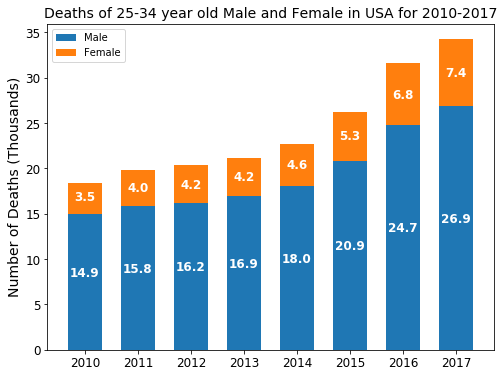

In [9]:
N = 8
male_data = tuple(male_deaths)
female_data = tuple(female_deaths)
ind = np.arange(N)    # the x locations for the groups
width = 0.65      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(8,6))

p1 = ax.bar(ind, male_deaths, width)
p2 = ax.bar(ind, female_deaths, width, bottom = male_data)

# autolabel(p2)
plt.ylabel('Number of Deaths (Thousands)',fontsize=14)
plt.title('Deaths of 25-34 year old Male and Female in USA for 2010-2017',fontsize=14)
plt.xticks(ind, year_labels,fontsize=14)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.tick_params(axis='both', which='major', labelsize=12)

def autolabel(rects, rects2):
    """Attach a text label above each bar in *rects*, displaying its height."""
    counter = 0
    for rect in rects:
        height = rect.get_height() + rects2[counter].get_height() 
        ax.annotate('{}'.format(round(rect.get_height(),1)),
                    xy=(rect.get_x() + rect.get_width() / 2, rects2[counter].get_height()*1.15),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='top', fontsize=12, color = 'white', weight="bold")
        counter += 1
        
def autolabel2(rects, rects2):
    """Attach a text label above each bar in *rects*, displaying its height."""
    counter = 0
    for rect in rects:
        height = rect.get_height() 
        ax.annotate('{}'.format(round(height,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color = 'white', weight="bold")
        counter += 1        
autolabel2(p1,p2)
autolabel(p2,p1)
plt.savefig("Images/Deaths_in_USA.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

## Top 5 Leading causes of death for 25-34 years old Male/Female in the US in 2010 - 2017

In [10]:
# setup lists
year_labels=[str(_) for _ in range(2010,2018,1)]
results_dict = {}
for year in range(2010,2018,1):
    csv_file = os.path.join('Resources',f'CDC_USA_{str(year)}_25-34y.csv')
    mortality_in_USA = pd.read_csv(csv_file)
    mortality_in_USA = mortality_in_USA.drop(['Year','Year Code','State Code', 'Crude Rate', 'Population'], axis = 1)
    death_counts_per_cause = mortality_in_USA.groupby('Cause of death')['Deaths'].sum()
    cause_df = pd.DataFrame({'Number of Deaths':death_counts_per_cause})
#     cause_df['Number of Deaths'].sort()
    top_five_causes = cause_df.sort_values('Number of Deaths', ascending = False).head()
    top_five_causes = top_five_causes.sort_values('Cause of death')
    top_five_causes = top_five_causes = top_five_causes.reset_index()
    results_dict.update({year:list(top_five_causes['Number of Deaths']/top_five_causes['Number of Deaths'].sum()*100)})
top_five_causes.head()

,Cause of death,Number of Deaths
0,Accidental poisoning by and exposure to narcot...,8115
1,Accidental poisoning by and exposure to other ...,6687
2,Assault by other and unspecified firearm disch...,4019
3,"Intentional self-harm by hanging, strangulatio...",2885
4,Person injured in unspecified motor-vehicle ac...,2077


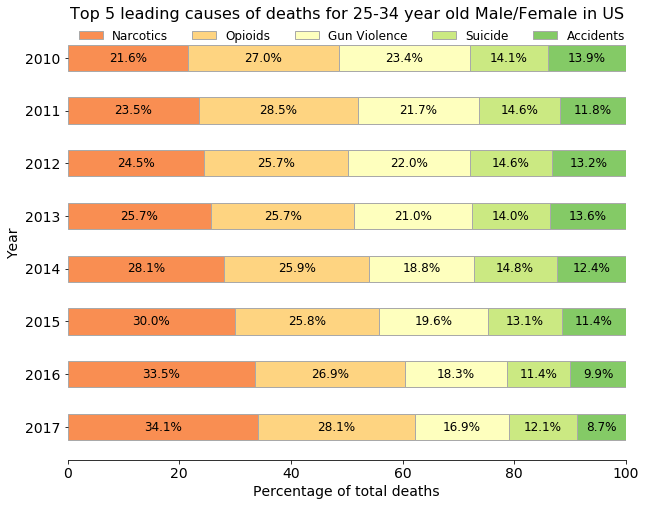

In [120]:
category_names = ['Narcotics', 'Opioids',
                  'Gun Violence', 'Suicide', 'Accidents']
results = results_dict

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    list_of_rects = []
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.25, 0.75, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.invert_yaxis()
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.tick_params(axis='both', which='major', labelsize=14)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]        
        starts = data_cum[:, i] - widths
        list_of_rects.append(ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color, edgecolor = 'darkgray'))
        
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 0.935),
              loc='lower left', fontsize=12, frameon = False)
    return fig, ax, list_of_rects


fig1, ax1, rects = survey(results, category_names)
for _ in range(0,len(rects),1):    
    for rect in rects[_]:
        width = rect.get_width() 
        ax1.annotate('{}%'.format(round(width,1)),
                    xy=(rect.get_x() + rect.get_width()/2, rect.get_y()+rect.get_height()/2),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center', fontsize='12', color = 'black')
plt.title('Top 5 leading causes of deaths for 25-34 year old Male/Female in US', fontsize = 16)
plt.xlabel('Percentage of total deaths', fontsize = 14)
plt.ylabel('Year', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# plt.show()    
plt.savefig("Images/Leading_causes_of_deaths_in_USA.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()